In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

np.random.seed(42)
tf.random.set_seed(42);

In [4]:
import numpy as np
dataset_address = "/content/drive/MyDrive/Colab_Dataset/ANN_DL_2024-2025/training_set.npz"
data = np.load(dataset_address)
X = data['images']
y = data['labels']
print(X.shape)
print(y.shape)

(13759, 96, 96, 3)
(13759, 1)


## Visualize the Data

In [5]:
label_dict = {
    0: 'Basophil',
    1: 'Eosinophil',
    2: 'Erythroblast',
    3: 'Immature granulocytes',
    4: 'Lymphocyte',
    5: 'Monocyte',
    6: 'Neutrophil',
    7: 'Platelet'
}

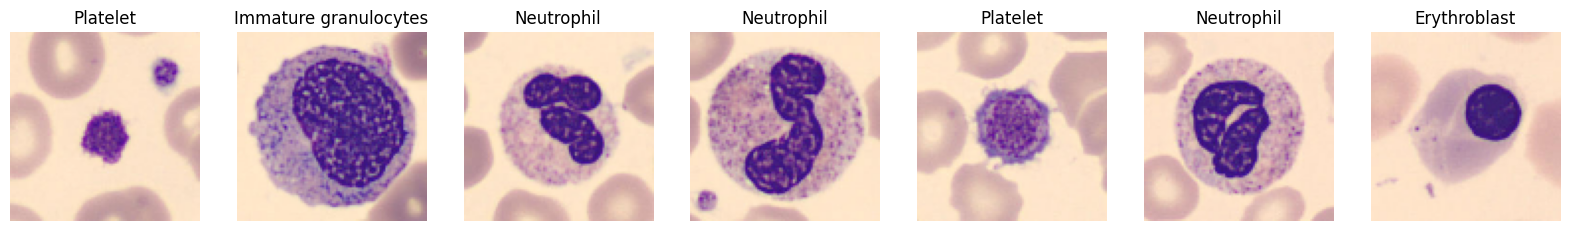

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 7, figsize=(20, 3))
for i in range(7):
  axes[i].imshow(X[i])
  axes[i].set_title(label_dict[y[i].item()])
  axes[i].axis('off')
plt.show()

## Preprocessing

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Preprocess the labels for training
y_categorical = to_categorical(y)

# Training and validation split
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Normalize the image data
X_train = X_train / 255.0
X_val = X_val / 255.0

In [8]:
# Model (CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')  # 8 classes for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.2967 - loss: 1.8301 - val_accuracy: 0.6072 - val_loss: 1.1681
Epoch 2/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5463 - loss: 1.1888 - val_accuracy: 0.7340 - val_loss: 0.7580
Epoch 3/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6669 - loss: 0.8842 - val_accuracy: 0.7758 - val_loss: 0.6402
Epoch 4/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7147 - loss: 0.7590 - val_accuracy: 0.8009 - val_loss: 0.5863
Epoch 5/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7265 - loss: 0.7237 - val_accuracy: 0.7798 - val_loss: 0.5593
Epoch 6/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7456 - loss: 0.6653 - val_accuracy: 0.7871 - val_loss: 0.5680
Epoch 7/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7576 - loss: 0.6303 - val_accuracy: 0.8325 - val_loss: 0.4509
Epoch 8/50
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7753 - loss: 0.5748 - val_acc

In [9]:
# Save the trained model
model.save('weights.keras')

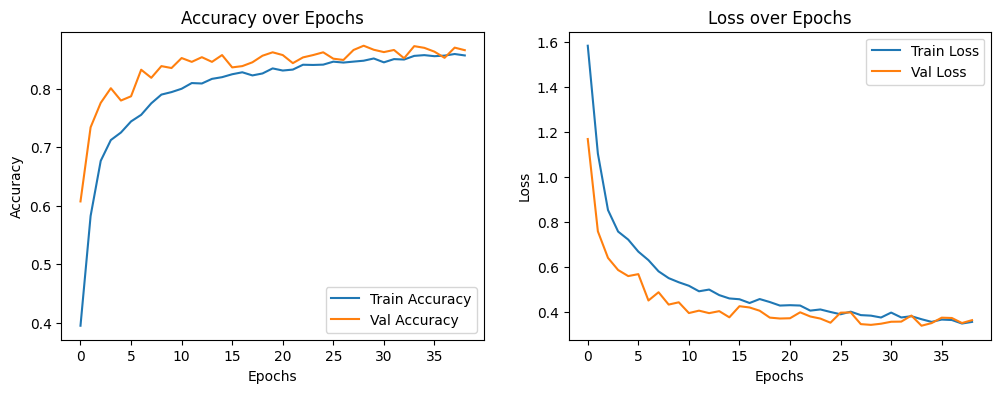

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8665 - loss: 0.3596
Validation Loss: 0.3389
Validation Accuracy: 0.8728


In [10]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

## Prepare the model.py file

In [17]:
%%writefile model.py
import numpy as np
from tensorflow.keras import models as tfk_models

class Model:
    def __init__(self):
        """
        Initializes the internal state of the model.
        """
        # Load the pre-trained model from the weights file
        self.neural_network = tfk_models.load_model('weights.keras')

    def predict(self, X):
        """
        Returns a numpy array of labels for the given input X.
        X is a numpy array of shape (n_samples, 96, 96, 3).
        The output should be a numpy array of shape (n_samples,)
        containing the predicted class labels.
        """
        # Get predictions from the model
        preds = self.neural_network.predict(X)
        # Convert softmax probabilities to class labels
        return np.argmax(preds, axis=1)

Writing model.py
